In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [22]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [23]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

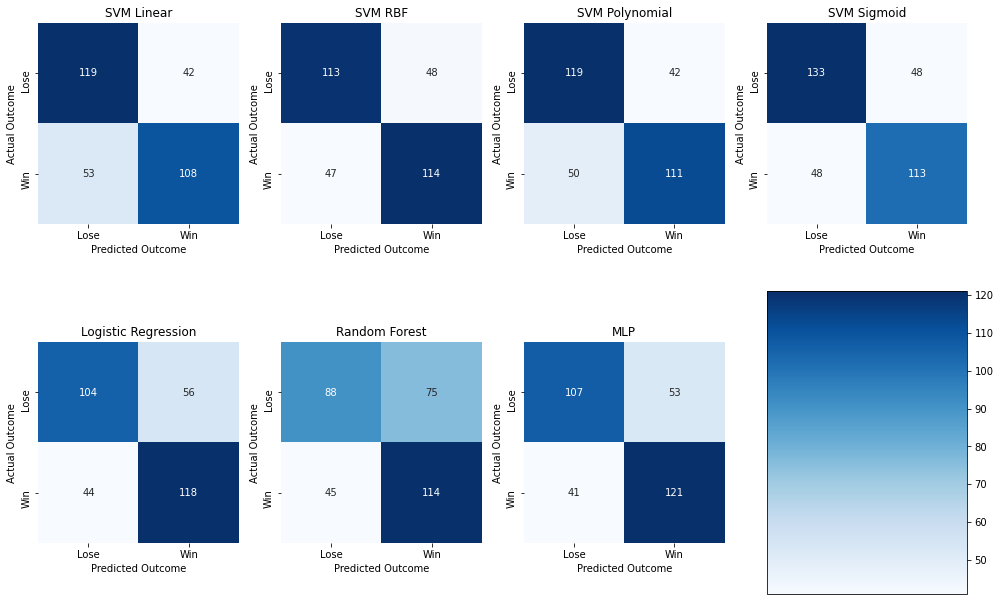

In [6]:
fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(14,9))

def heatmap(data,a,b):
    return sns.heatmap(data, annot = True, cmap='Blues', cbar=False, square=True,yticklabels=['Lose','Win'], xticklabels=['Lose','Win'],ax=axs[a,b], fmt='.3g')

heatmap(np.array([[88,  75],
       [ 45, 114]]),1,1)
heatmap(np.array([[119,  42],
       [ 53, 108]]),0,0)
heatmap(np.array([[113,  48],
       [ 47, 114]]),0,1)
heatmap(np.array([[119, 42],
       [ 50, 111]]),0,2)

heatmap(np.array([[133, 48],
       [ 48, 113]]),0,3)
heatmap(np.array([[104, 56],
       [ 44, 118]]),1,0)
heatmap(np.array([[107, 53],
       [ 41, 121]]),1,2)


for i in range(2):
    for j in range(3):
        axs[i,j].set_xlabel('Predicted Outcome')
        axs[i,j].set_ylabel('Actual Outcome')
axs[0,3].set_xlabel('Predicted Outcome')
axs[0,3].set_ylabel('Actual Outcome')

axs[0,0].set_title('SVM Linear')
axs[0,1].set_title('SVM RBF')
axs[0,2].set_title('SVM Polynomial')
axs[0,3].set_title('SVM Sigmoid')
axs[1,0].set_title('Logistic Regression')
axs[1,1].set_title('Random Forest')
axs[1,2].set_title('MLP')


fig.colorbar(axs[1,2].collections[0], cax=axs[1,3])
fig.tight_layout()
plt.savefig('confusionmatrices.pdf', dpi=300)
plt.show()

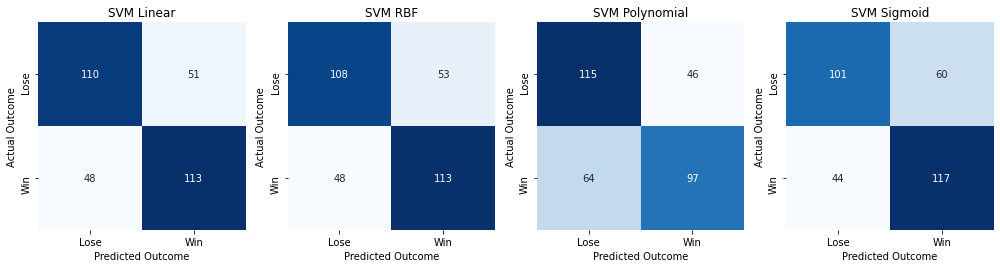

In [28]:
fig, axs = plt.subplots(nrows=1,ncols=4, figsize=(14,4.5))

def heatmap(data,a):
    return sns.heatmap(data, annot = True, cbar=False,cmap='Blues', square=True,yticklabels=['Lose','Win'], xticklabels=['Lose','Win'],ax=axs[a], fmt='.3g')


heatmap(np.array([[110,  51],
       [ 48, 113]]),0)
heatmap(np.array([[108,  53],
       [ 48, 113]]),1)
heatmap(np.array([[115, 46],
       [ 64, 97]]),2)

heatmap(np.array([[101, 60],
       [ 44, 117]]),3)


for j in range(4):
    axs[j].set_xlabel('Predicted Outcome')
    axs[j].set_ylabel('Actual Outcome')

axs[0].set_title('SVM Linear')
axs[1].set_title('SVM RBF')
axs[2].set_title('SVM Polynomial')
axs[3].set_title('SVM Sigmoid')

fig.tight_layout()
plt.savefig('confusionmatricesr1.pdf', dpi=300)
plt.show()

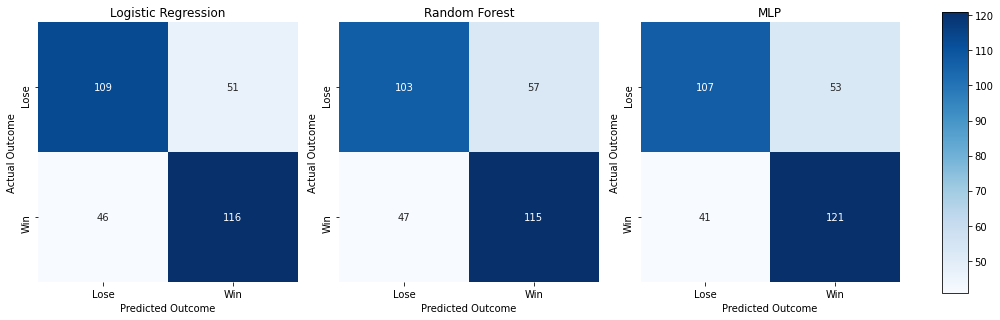

In [10]:
fig, axs = plt.subplots(nrows=1,ncols=4, figsize=(14,4.5), gridspec_kw={'width_ratios': [1, 1,1,0.1]})

def heatmap(data,a):
    return sns.heatmap(data, annot = True, cmap='Blues', cbar=False, square=True,yticklabels=['Lose','Win'], xticklabels=['Lose','Win'],ax=axs[a], fmt='.3g')

heatmap(np.array([[103,  57],
       [ 47, 115]]),1)

heatmap(np.array([[109, 51],
       [ 46, 116]]),0)
heatmap(np.array([[107, 53],
       [ 41, 121]]),2)



for j in range(4):
    axs[j].set_xlabel('Predicted Outcome')
    axs[j].set_ylabel('Actual Outcome')


axs[0].set_title('Logistic Regression')
axs[1].set_title('Random Forest')
axs[2].set_title('MLP')


fig.colorbar(axs[2].collections[0], cax=axs[3])
fig.tight_layout()
plt.savefig('confusionmatricesr2.pdf', dpi=300)
plt.show()

In [6]:
data = pd.read_csv('data_scaled.csv')
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def conf(model,n):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=n)
    y_pred = cross_val_predict(model, X_trainval, y_trainval, cv=5)
    conf_mat = confusion_matrix(y_trainval, y_pred)
    print(conf_mat)


In [19]:
conf(SVC(C=0.3, gamma=0.1, kernel='sigmoid', random_state=1)  ,20)

[[101  60]
 [ 44 117]]


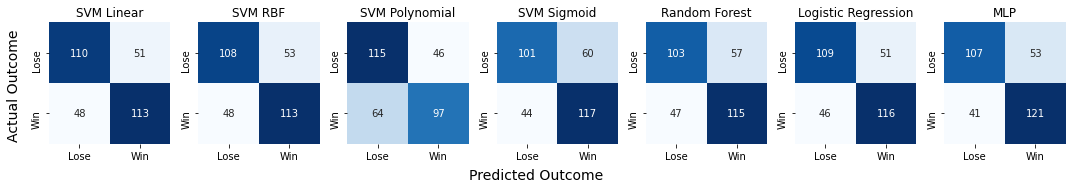

In [45]:
fig, axs = plt.subplots(nrows=1,ncols=7, figsize=(15,3))

def heatmap(data,a):
    return sns.heatmap(data, annot = True, cbar=False,cmap='Blues', square=True,yticklabels=['Lose','Win'], xticklabels=['Lose','Win'],ax=axs[a], fmt='.3g')


heatmap(np.array([[110,  51],
       [ 48, 113]]),0)
heatmap(np.array([[108,  53],
       [ 48, 113]]),1)
heatmap(np.array([[115, 46],
       [ 64, 97]]),2)

heatmap(np.array([[101, 60],
       [ 44, 117]]),3)
heatmap(np.array([[103,  57],
       [ 47, 115]]),4)

heatmap(np.array([[109, 51],
       [ 46, 116]]),5)
heatmap(np.array([[107, 53],
       [ 41, 121]]),6)


fig.supylabel('Actual Outcome',y=0.55,fontsize=14,x=0.01)
fig.supxlabel('Predicted Outcome',y=0.1,fontsize=14)
axs[0].set_title('SVM Linear')
axs[1].set_title('SVM RBF')
axs[2].set_title('SVM Polynomial')
axs[3].set_title('SVM Sigmoid')
axs[4].set_title('Random Forest')
axs[5].set_title('Logistic Regression')
axs[6].set_title('MLP')

fig.tight_layout()
plt.savefig('confusionmatrices.pdf', dpi=300)
plt.show()